# Day 09. Exercise 00
# Regularization

## 0. Imports

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pickle

## 1. Preprocessing

1. Read the file `dayofweek.csv` that you used in the previous day to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [2]:
with open("../data/dayofweek.csv") as dof:
    df = pd.read_csv(dof)

In [3]:
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,-0.629151,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,-0.597248,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,-0.565345,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
X = df.loc[:, df.columns != 'dayofweek'] #задаем Х все кроме столбца dayofweek
y = df.dayofweek 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=21, stratify = None)

## 2. Logreg regularization

### a. Default regularization

1. Train a baseline model with the only parameters `random_state=21`, `fit_intercept=False`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model


The result of the code where you trained and evaluated the baseline model should be exactly like this (use `%%time` to get the info about how long it took to run the cell):

```
train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
```

In [5]:
clf = LogisticRegression(random_state=21, fit_intercept=False).fit(X, y)
clf.score(X, y)

0.6405693950177936

In [6]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)


KFold(n_splits=10, random_state=None, shuffle=False)


In [7]:
def crossval(estimator, X, y, n_splits=10):
    train_scores = []
    valid_scores = []
    cv = StratifiedKFold(n_splits=n_splits)
    for train, valid in cv.split(X, y):
        estimator.fit(X.iloc[train], y.iloc[train])
        y_train_pred = estimator.predict(X.iloc[train])
        y_valid_pred = estimator.predict(X.iloc[valid])
        train_scores.append(accuracy_score(y.iloc[train], y_train_pred))
        valid_scores.append(accuracy_score(y.iloc[valid], y_valid_pred))
    for i in range(len(train_scores)):
        print(f'train -  {train_scores[i]:.5f}   |   valid -  {valid_scores[i]:.5f}')
    print(f'Average accuracy on crossval is {np.mean(valid_scores):.5f}')
    print(f'Std is {np.std(valid_scores):.5f}')
    
crossval(clf, X_train, y_train)

train -  0.65347   |   valid -  0.50000
train -  0.66007   |   valid -  0.58824
train -  0.64356   |   valid -  0.61765
train -  0.68647   |   valid -  0.41176
train -  0.65017   |   valid -  0.52941
train -  0.65347   |   valid -  0.50000
train -  0.65677   |   valid -  0.67647
train -  0.68421   |   valid -  0.45455
train -  0.65789   |   valid -  0.66667
train -  0.66118   |   valid -  0.60606
Average accuracy on crossval is 0.55508
Std is 0.08495


### b. Optimizing regularization parameters

1. In the cells below try different values of penalty: `none`, `l1`, `l2` – you can change the values of solver too.

In [8]:
clf1 = LogisticRegression(penalty="l1", tol=0.01, solver="liblinear", random_state=21, fit_intercept=False).fit(X, y)
clf.score(X, y)

0.5901542111506525

In [9]:
clf2 = LogisticRegression(penalty="l2", solver="liblinear", random_state=21, fit_intercept=False).fit(X, y)
clf.score(X, y)

0.5901542111506525

tol = Tolerance for stopping criteria.
solver = Algorithm to use in the optimization problem. 
    Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects: 
    For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
    For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
    ‘liblinear’ is limited to one-versus-rest schemes.



## 3. SVM regularization

### a. Default regularization

1. Train a baseline model with the only parameters `probability=True`, `kernel='linear'`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [10]:
svc = SVC(kernel='linear', probability=True, random_state=21)

In [11]:
crossval(svc, X_train, y_train)

train -  0.71617   |   valid -  0.55882
train -  0.69307   |   valid -  0.58824
train -  0.69637   |   valid -  0.76471
train -  0.73267   |   valid -  0.41176
train -  0.70957   |   valid -  0.61765
train -  0.70297   |   valid -  0.52941
train -  0.70627   |   valid -  0.73529
train -  0.72368   |   valid -  0.39394
train -  0.70724   |   valid -  0.69697
train -  0.72039   |   valid -  0.63636
Average accuracy on crossval is 0.59332
Std is 0.11863


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `C`.

In [12]:
svc1 = SVC(C=0.5, kernel='linear', probability=True, random_state=21)
crossval(svc1, X_train, y_train)

train -  0.68317   |   valid -  0.58824
train -  0.68317   |   valid -  0.58824
train -  0.66337   |   valid -  0.70588
train -  0.71617   |   valid -  0.38235
train -  0.68647   |   valid -  0.58824
train -  0.66667   |   valid -  0.52941
train -  0.66337   |   valid -  0.67647
train -  0.70724   |   valid -  0.51515
train -  0.67434   |   valid -  0.69697
train -  0.70724   |   valid -  0.69697
Average accuracy on crossval is 0.59679
Std is 0.09784


C = float, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

In [13]:
svc2 = SVC(C=0.01, kernel='linear', probability=True, random_state=21)
crossval(svc2, X_train, y_train)

train -  0.31353   |   valid -  0.35294
train -  0.33333   |   valid -  0.29412
train -  0.31353   |   valid -  0.35294
train -  0.35644   |   valid -  0.35294
train -  0.33333   |   valid -  0.29412
train -  0.33003   |   valid -  0.26471
train -  0.31683   |   valid -  0.29412
train -  0.32237   |   valid -  0.36364
train -  0.31250   |   valid -  0.33333
train -  0.31908   |   valid -  0.30303
Average accuracy on crossval is 0.32059
Std is 0.03269


In [14]:
svc3 = SVC(C=0.1, kernel='linear', probability=True, random_state=21)
crossval(svc3, X_train, y_train)

train -  0.49505   |   valid -  0.52941
train -  0.47195   |   valid -  0.47059
train -  0.49505   |   valid -  0.52941
train -  0.52475   |   valid -  0.26471
train -  0.49835   |   valid -  0.47059
train -  0.48515   |   valid -  0.44118
train -  0.46205   |   valid -  0.41176
train -  0.51316   |   valid -  0.42424
train -  0.47697   |   valid -  0.42424
train -  0.49671   |   valid -  0.45455
Average accuracy on crossval is 0.44207
Std is 0.07075


## 4. Tree

### a. Default regularization

1. Train a baseline model with the only parameter `max_depth=10` and `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [15]:
dtc = DecisionTreeClassifier(max_depth=10, random_state=21)

In [16]:
crossval(dtc, X_train, y_train)

train -  0.91749   |   valid -  0.70588
train -  0.88779   |   valid -  0.64706
train -  0.85809   |   valid -  0.79412
train -  0.89439   |   valid -  0.35294
train -  0.89439   |   valid -  0.61765
train -  0.90759   |   valid -  0.67647
train -  0.84818   |   valid -  0.70588
train -  0.87500   |   valid -  0.63636
train -  0.90132   |   valid -  0.60606
train -  0.89145   |   valid -  0.75758
Average accuracy on crossval is 0.65000
Std is 0.11433


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `max_depth`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [17]:
dtc2 = DecisionTreeClassifier(max_depth=2, random_state=21)
crossval(dtc2, X_train, y_train)

train -  0.45215   |   valid -  0.50000
train -  0.45875   |   valid -  0.44118
train -  0.45215   |   valid -  0.50000
train -  0.44884   |   valid -  0.26471
train -  0.46205   |   valid -  0.41176
train -  0.45545   |   valid -  0.47059
train -  0.43234   |   valid -  0.41176
train -  0.42763   |   valid -  0.45455
train -  0.45395   |   valid -  0.48485
train -  0.45724   |   valid -  0.45455
Average accuracy on crossval is 0.43939
Std is 0.06549


max_depth = int, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [18]:
dtc3 = DecisionTreeClassifier(max_depth=2, random_state=21)
crossval(dtc3, X_train, y_train)

train -  0.45215   |   valid -  0.50000
train -  0.45875   |   valid -  0.44118
train -  0.45215   |   valid -  0.50000
train -  0.44884   |   valid -  0.26471
train -  0.46205   |   valid -  0.41176
train -  0.45545   |   valid -  0.47059
train -  0.43234   |   valid -  0.41176
train -  0.42763   |   valid -  0.45455
train -  0.45395   |   valid -  0.48485
train -  0.45724   |   valid -  0.45455
Average accuracy on crossval is 0.43939
Std is 0.06549


In [19]:
dtc4 = DecisionTreeClassifier(max_depth=20, random_state=21)
crossval(dtc4, X_train, y_train)

train -  1.00000   |   valid -  0.70588
train -  1.00000   |   valid -  0.76471
train -  1.00000   |   valid -  0.82353
train -  1.00000   |   valid -  0.47059
train -  1.00000   |   valid -  0.70588
train -  1.00000   |   valid -  0.67647
train -  1.00000   |   valid -  0.76471
train -  1.00000   |   valid -  0.63636
train -  1.00000   |   valid -  0.72727
train -  1.00000   |   valid -  0.84848
Average accuracy on crossval is 0.71239
Std is 0.10109


## 5. Random forest

### a. Default regularization

1. Train a baseline model with the only parameters `n_estimators=50`, `max_depth=14`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [20]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=14, random_state=21)
crossval(rfc, X_train, y_train)

train -  0.99010   |   valid -  0.64706
train -  0.96370   |   valid -  0.73529
train -  0.98680   |   valid -  0.76471
train -  0.97690   |   valid -  0.47059
train -  0.98680   |   valid -  0.79412
train -  0.98680   |   valid -  0.70588
train -  0.99010   |   valid -  0.76471
train -  0.98355   |   valid -  0.63636
train -  0.99342   |   valid -  0.75758
train -  0.98026   |   valid -  0.75758
Average accuracy on crossval is 0.70339
Std is 0.09193


### b. Optimizing regularization parameters

1. In the new cells try different values of the parameters `max_depth` and `n_estimators`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [21]:
rfc1 = RandomForestClassifier(n_estimators=10, max_depth=14, random_state=21)
crossval(rfc1, X_train, y_train)

train -  0.97360   |   valid -  0.61765
train -  0.92739   |   valid -  0.76471
train -  0.96370   |   valid -  0.73529
train -  0.93399   |   valid -  0.41176
train -  0.95380   |   valid -  0.70588
train -  0.96700   |   valid -  0.76471
train -  0.93729   |   valid -  0.73529
train -  0.94079   |   valid -  0.63636
train -  0.96711   |   valid -  0.78788
train -  0.93092   |   valid -  0.75758
Average accuracy on crossval is 0.69171
Std is 0.10731


In [22]:
rfc2 = RandomForestClassifier(n_estimators=10, max_depth=20, random_state=21)
crossval(rfc2, X_train, y_train)

train -  0.98350   |   valid -  0.67647
train -  0.97360   |   valid -  0.79412
train -  0.98350   |   valid -  0.76471
train -  0.98020   |   valid -  0.55882
train -  0.98020   |   valid -  0.70588
train -  0.97030   |   valid -  0.76471
train -  0.97690   |   valid -  0.79412
train -  0.97039   |   valid -  0.69697
train -  0.97368   |   valid -  0.78788
train -  0.97368   |   valid -  0.75758
Average accuracy on crossval is 0.73012
Std is 0.06970


In [23]:
rfc3 = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=21)
crossval(rfc3, X_train, y_train)

train -  1.00000   |   valid -  0.73529
train -  1.00000   |   valid -  0.79412
train -  1.00000   |   valid -  0.73529
train -  0.99670   |   valid -  0.52941
train -  1.00000   |   valid -  0.79412
train -  1.00000   |   valid -  0.70588
train -  0.99670   |   valid -  0.82353
train -  0.99671   |   valid -  0.66667
train -  0.99671   |   valid -  0.78788
train -  0.99671   |   valid -  0.78788
Average accuracy on crossval is 0.73601
Std is 0.08258


In [24]:
rfc4 = RandomForestClassifier(n_estimators=60, max_depth=25, random_state=21)
crossval(rfc4, X_train, y_train)

train -  1.00000   |   valid -  0.70588
train -  1.00000   |   valid -  0.82353
train -  1.00000   |   valid -  0.73529
train -  1.00000   |   valid -  0.55882
train -  1.00000   |   valid -  0.79412
train -  1.00000   |   valid -  0.70588
train -  1.00000   |   valid -  0.79412
train -  1.00000   |   valid -  0.66667
train -  1.00000   |   valid -  0.78788
train -  1.00000   |   valid -  0.78788
Average accuracy on crossval is 0.73601
Std is 0.07603


## 6. Predictions

1. Choose the best model and use it to make predictions for the test dataset.
2. Calculate the final accuracy.
3. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your test dataset).
4. Save the model.

In [25]:
rfc4 = RandomForestClassifier(n_estimators=60, max_depth=25, random_state=21)
crossval(rfc4, X_train, y_train)

train -  1.00000   |   valid -  0.70588
train -  1.00000   |   valid -  0.82353
train -  1.00000   |   valid -  0.73529
train -  1.00000   |   valid -  0.55882
train -  1.00000   |   valid -  0.79412
train -  1.00000   |   valid -  0.70588
train -  1.00000   |   valid -  0.79412
train -  1.00000   |   valid -  0.66667
train -  1.00000   |   valid -  0.78788
train -  1.00000   |   valid -  0.78788
Average accuracy on crossval is 0.73601
Std is 0.07603


In [55]:
def crossval_clf(n_splits, X, y, model):
  train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state=21)

  ft_m = model.fit(train_data, train_labels)
  scores = cross_val_score(model, train_data, train_labels, cv=n_splits)
  scores_test = cross_val_score(model, test_data, test_labels, cv=n_splits)
  predict = cross_val_predict(ft_m, test_data, test_labels, cv=n_splits)
  accuracy = metrics.accuracy_score(test_labels,predict)

  for i in range(0, len(scores)):
    print(f'train - {scores[i]} | test - {scores_test[i]}')
  print(f'Average mean accuracy on crossval is {accuracy}\n')


In [60]:
RF = RandomForestClassifier(n_estimators=60, max_depth=25, random_state=21)
crossval_clf(10, X, y, RF)

train - 0.9185185185185185 | test - 0.7647058823529411
train - 0.9037037037037037 | test - 0.8235294117647058
train - 0.8962962962962963 | test - 0.7941176470588235
train - 0.9407407407407408 | test - 0.7352941176470589
train - 0.9259259259259259 | test - 0.7647058823529411
train - 0.9259259259259259 | test - 0.7941176470588235
train - 0.8962962962962963 | test - 0.7352941176470589
train - 0.9259259259259259 | test - 0.8529411764705882
train - 0.917910447761194 | test - 0.7878787878787878
train - 0.9029850746268657 | test - 0.8484848484848485
Average mean accuracy on crossval is 0.7899408284023669



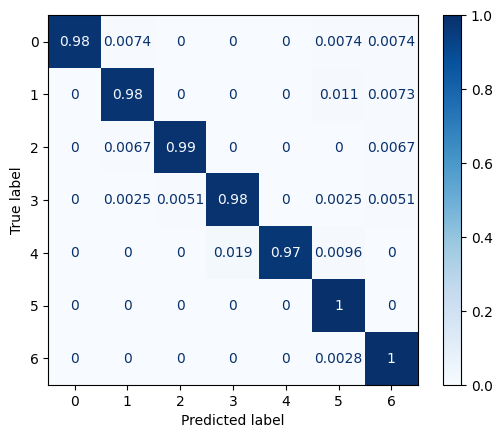

In [63]:
ConfusionMatrixDisplay.from_estimator(RF, X, y, cmap=plt.cm.Blues,normalize=normalize)

The best prediction is made for weekends6 the worst is for friday& Maybe because some people consider it as a beginning of weekends and don't want to commit before weekends

In [67]:
best_clf = RandomForestClassifier()
RandomForestClassifier(n_estimators=60, max_depth=25, random_state=21).fit(X, y)
with open('best_model', 'wb') as fout:
  pickle.dump(best_clf, fout)